In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('OnlineNewsPopularity-3.csv')
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
# to check the shape or the dataframe
data.shape

(39644, 61)

In [5]:
# since we won't to classify we will look for the 50 pecental of the share price and input either 0 or 1 
data.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [9]:
# looks like the 50% is 1400 then we can input share price lower than 1400 as 0 and high as 1

In [4]:
#This is a function that will input 0 for lower an 1400 and 1 for otherwhuse 
data['shares'] = np.where(data['shares']<= 1400, 0, 1)

In [8]:
data.shares.value_counts()

0    20082
1    19562
Name: shares, dtype: int64

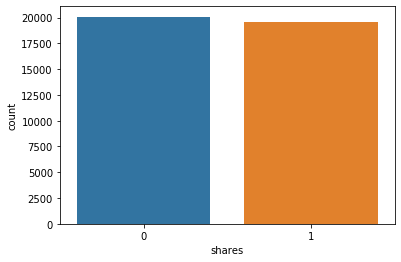

In [5]:
sns.countplot(data.shares)

In [6]:
#equally distributed
data.corr().round(3)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000,-0.240,-0.063,0.003,0.000,0.004,-0.001,0.065,-0.028,0.001,...,0.055,0.098,-0.001,0.062,-0.063,-0.016,0.039,0.012,-0.003,0.046
n_tokens_title,-0.240,1.000,0.018,-0.005,-0.005,-0.005,-0.053,-0.015,-0.009,0.051,...,-0.025,-0.022,-0.017,-0.029,0.011,0.077,0.000,-0.147,0.041,-0.043
n_tokens_content,-0.063,0.018,1.000,-0.005,0.018,0.000,0.423,0.305,0.343,0.104,...,-0.261,0.416,-0.130,-0.451,0.226,0.004,0.023,0.007,0.013,0.040
n_unique_tokens,0.003,-0.005,-0.005,1.000,1.000,1.000,-0.004,0.007,0.019,-0.001,...,0.009,-0.009,0.001,0.010,-0.007,-0.005,-0.002,-0.009,-0.004,0.003
n_non_stop_words,0.000,-0.005,0.018,1.000,1.000,1.000,0.006,0.014,0.028,-0.001,...,0.001,0.002,-0.001,-0.001,-0.001,-0.005,-0.002,-0.009,-0.004,0.004
n_non_stop_unique_tokens,0.004,-0.005,0.000,1.000,1.000,1.000,-0.005,0.008,0.014,-0.001,...,0.008,-0.002,-0.002,0.004,-0.007,-0.006,-0.003,-0.009,-0.005,0.002
num_hrefs,-0.001,-0.053,0.423,-0.004,0.006,-0.005,1.000,0.396,0.343,0.115,...,-0.082,0.287,-0.152,-0.264,0.055,0.044,0.039,0.009,0.057,0.088
num_self_hrefs,0.065,-0.015,0.305,0.007,0.014,0.008,0.396,1.000,0.239,0.077,...,-0.073,0.190,-0.058,-0.122,0.039,-0.011,0.026,0.009,-0.007,0.033
num_imgs,-0.028,-0.009,0.343,0.019,0.028,0.014,0.343,0.239,1.000,-0.067,...,-0.025,0.155,-0.072,-0.137,0.043,0.057,0.046,-0.014,0.063,0.067
num_videos,0.001,0.051,0.104,-0.001,-0.001,-0.001,0.115,0.077,-0.067,1.000,...,-0.010,0.126,-0.116,-0.138,0.027,0.061,0.022,-0.022,0.055,0.009


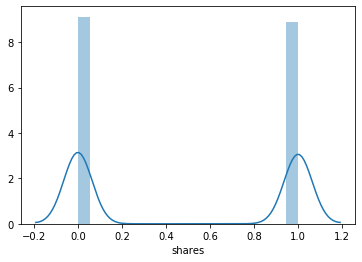

In [7]:
sns.distplot(data.shares)

In [8]:
#the url feature might not be usefull for the project so i will drop it 
data.drop(['url'],axis=1,inplace =True)

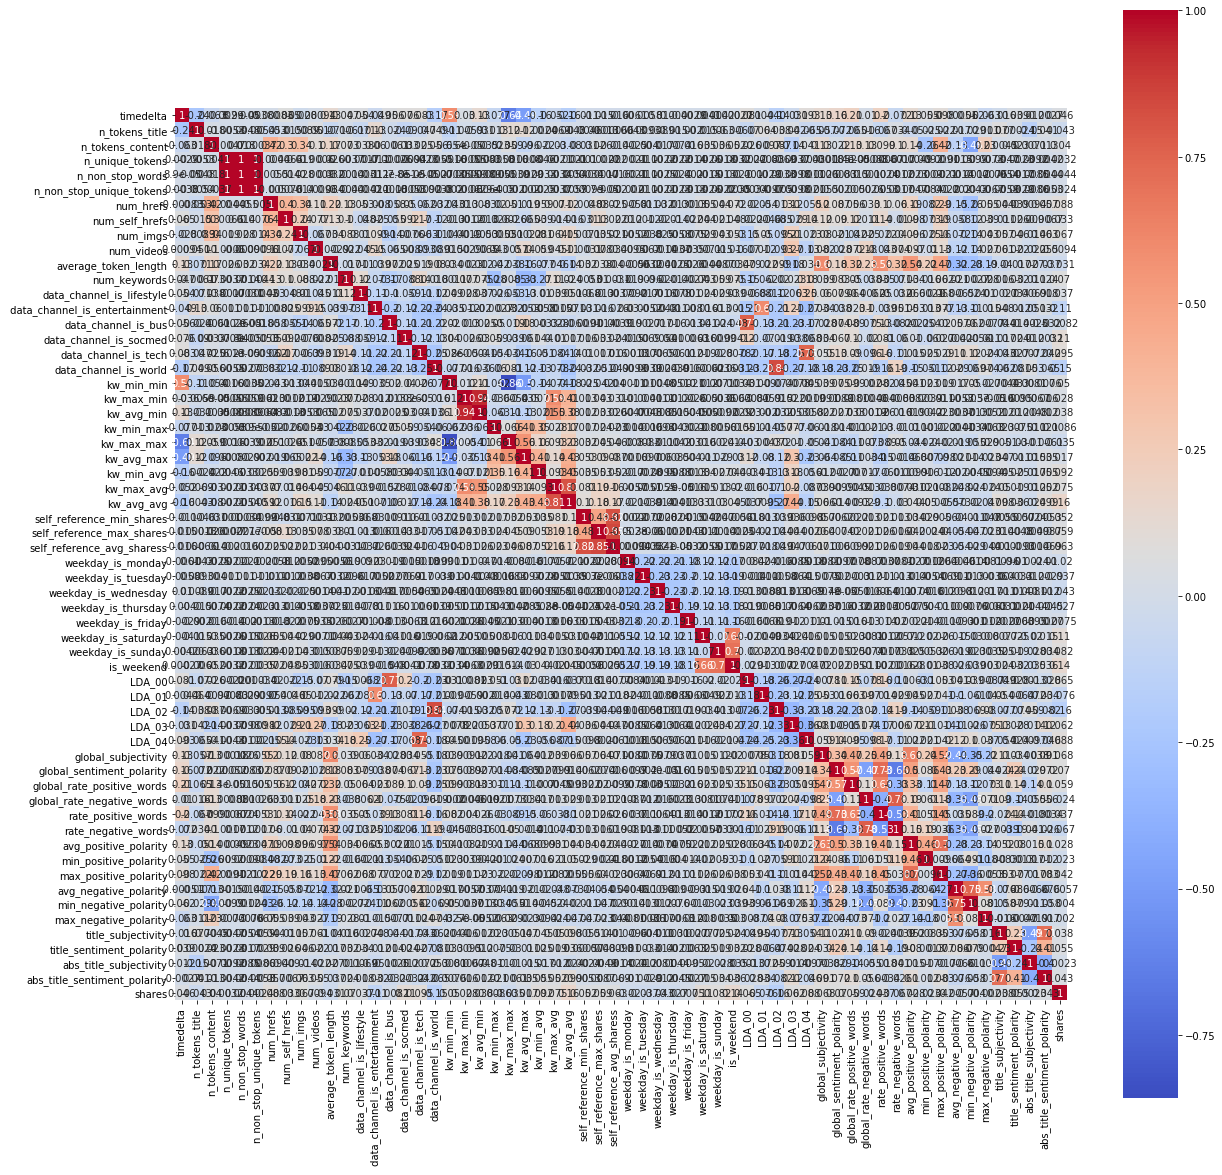

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar = True,  square = True,
            cmap= 'coolwarm', annot=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [11]:
X=data.drop(['shares'], axis=1)
y=data['shares']

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
abc_clf = AdaBoostClassifier()
nvl_clf = BernoulliNB()

In [21]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('abc', abc_clf), ('nvl', nvl_clf) ],
voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [22]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,abc_clf, nvl_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5970134194329533
RandomForestClassifier 0.6586620926243568
SVC 0.5568560185652306
VotingClassifier 0.6573504187266673
AdaBoostClassifier 0.6582585006558369
BernoulliNB 0.6036726869135304


In [25]:
from sklearn.decomposition import PCA


In [28]:
rbf_pca = PCA(n_components = 2)
X3 = rbf_pca.fit_transform(X)

In [29]:
X3

array([[ 791448.52013582,   84416.86766097],
       [ 791459.1104701 ,   84389.35132371],
       [ 791439.50865048,   84440.26321053],
       ...,
       [ -97369.01742149,   -8849.93537603],
       [ -79679.47811247,  -46222.13172928],
       [-135373.45617641,  111055.91089775]])

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.25,random_state=0)

In [31]:

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('abc', abc_clf), ('nvl', nvl_clf) ],
voting='hard'
)
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [32]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,abc_clf, nvl_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5382907880133185
RandomForestClassifier 0.5312279285642215
SVC 0.5474725052971446
VotingClassifier 0.5483805872263142
AdaBoostClassifier 0.5479769952577944
BernoulliNB 0.5394006659267481
